In [1]:
import cv2
import glob
import os
import numpy as np

In [2]:
dataset_path = "E:\Project\Data Science\Face Recognition\dataset"

In [3]:
dir_path = glob.glob(dataset_path + "\*")

In [4]:
dir_path

['E:\\Project\\Data Science\\Face Recognition\\dataset\\Angry',
 'E:\\Project\\Data Science\\Face Recognition\\dataset\\Fear',
 'E:\\Project\\Data Science\\Face Recognition\\dataset\\Happy',
 'E:\\Project\\Data Science\\Face Recognition\\dataset\\Neutral',
 'E:\\Project\\Data Science\\Face Recognition\\dataset\\Sad',
 'E:\\Project\\Data Science\\Face Recognition\\dataset\\Suprise']

In [5]:
# Extraction Label
string_label = []
string_number = []
for string in dir_path:
    string_label.append(string.split("\\")[5])

In [6]:
string_label

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

In [7]:
image_path = []
for idx, string in enumerate(dir_path):
    image_path.append(np.asarray(glob.glob(string + "\*")))

In [8]:
all_image_path = []
for label in image_path:
    for string in label:
        all_image_path.append(string)

In [9]:
len(all_image_path)

28273

In [10]:
def extract_label(path):
    label = path.split("\\")[6].split("-")[0]
    
    x = 0
    for idx, string in enumerate(string_label):
        if label == string:
            x = idx
            break
            
    return np.asarray(x)

In [11]:
# Load Image
x = []
y = []
for img_path in all_image_path:
    # Open image and append to array
    x.append(cv2.imread(img_path))
    # Mapping Label
    y.append(extract_label(img_path))

In [15]:
x[0]

array([[[152, 152, 152],
        [149, 149, 149],
        [147, 147, 147],
        ...,
        [129, 129, 129],
        [139, 139, 139],
        [121, 121, 121]],

       [[149, 149, 149],
        [152, 152, 152],
        [150, 150, 150],
        ...,
        [121, 121, 121],
        [146, 146, 146],
        [135, 135, 135]],

       [[152, 152, 152],
        [152, 152, 152],
        [157, 157, 157],
        ...,
        [112, 112, 112],
        [121, 121, 121],
        [145, 145, 145]],

       ...,

       [[187, 187, 187],
        [189, 189, 189],
        [120, 120, 120],
        ...,
        [184, 184, 184],
        [185, 185, 185],
        [188, 188, 188]],

       [[188, 188, 188],
        [189, 189, 189],
        [193, 193, 193],
        ...,
        [185, 185, 185],
        [181, 181, 181],
        [189, 189, 189]],

       [[186, 186, 186],
        [185, 185, 185],
        [183, 183, 183],
        ...,
        [193, 193, 193],
        [181, 181, 181],
        [183, 183, 183]]

In [16]:
string_label[y[27000]]

'Suprise'

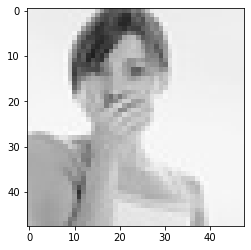

In [17]:
import matplotlib.pyplot as plt

plt.imshow(x[27000])

In [18]:
# Saving to npz
x = np.asarray(x)
y = np.asarray(y)

In [20]:
np.savez("utils\\dataset.npz", x=x, y=y)